In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [3]:
df = pd.read_csv("/content/power_data.csv")

In [4]:
df['Datetimeserverdell'] = pd.to_datetime(df['Datetimeserverdell'], format='%H:%M:%S')
df['Datetimeserverdell'] = df['Datetimeserverdell'].dt.hour * 3600 + df['Datetimeserverdell'].dt.minute * 60 + df['Datetimeserverdell'].dt.second

In [5]:
x = df[['Datetimeserverdell']]
y = df['Total Load kW']

In [6]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x, y)

DecisionTreeRegressor(random_state=42)

In [7]:
dt_predictions = dt_model.predict(x)

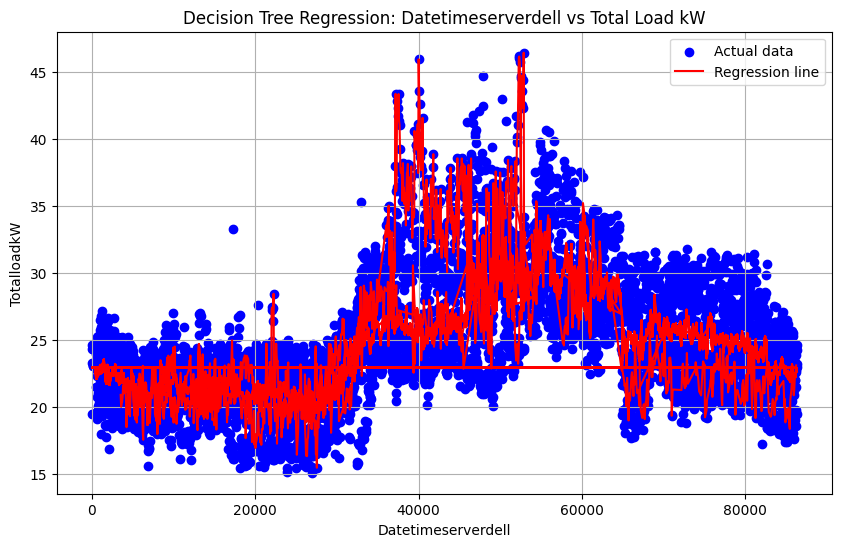

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, dt_predictions, color='red', label='Regression line')
plt.title('Decision Tree Regression: Datetimeserverdell vs Total Load kW')
plt.xlabel('Datetimeserverdell')
plt.ylabel('TotalloadkW')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
dt_rmse = mean_squared_error(y, dt_predictions)
dt_mape = mean_absolute_percentage_error(y, dt_predictions)
dt_r2_score = dt_model.score(x, y)

In [10]:
print(f'RMSE: {2.55389476523443}')
print(f'MAPE: {dt_mape}')
print(f'R² Score: {dt_r2_score}')

RMSE: 2.55389476523443
MAPE: 0.07562371438428854
R² Score: 0.7003401819148836


In [11]:
new_time = np.array([[43200]])  # Replace 10 with the desired time value
predicted_load = dt_model.predict(new_time)
print(f"Predicted load for entered time {new_time[0][0]}: {predicted_load[0]}")

Predicted load for entered time 43200: 25.759999999999998


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
